## EDA Covid-19 Case Surveillance Public Use Dataset

In [ ]:
# Importando librerias para nuestra EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, warnings
warnings.simplefilter("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Haciendo uso de librerias pandas para dara lectura a nuestro conjunto de datos
path = '/content/drive/MyDrive/Colab Notebooks/DSRP_python/DataSet_Covid-19_Case_Surveillance_Public_Use_Dataset/COVID-19_Case_Surveillance_Public_Use_Data.csv'
data = pd.read_csv(path, sep=',')

In [ ]:
data.columns

Index(['cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'current_status', 'sex',
       'age_group', 'Race and ethnicity (combined)', 'hosp_yn', 'icu_yn',
       'death_yn', 'medcond_yn'],
      dtype='object')

In [ ]:
cols_new = ['cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'status', 'sex',
            'age_group', 'race', 'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn']

In [ ]:
DataSet = pd.DataFrame(data=data.values, columns=cols_new)
DataSet.head(10)

,cdc_report_dt,pos_spec_dt,onset_dt,status,sex,age_group,race,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
5,2020/11/17,2020/11/10,2020/11/08,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
6,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,Missing,Missing
7,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
8,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Unknown,Unknown,No,Unknown
9,2020/11/17,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing


In [ ]:
DataSet.shape

(8405079, 11)

In [ ]:
DataSet.isnull().sum()

cdc_report_dt          0
pos_spec_dt      5534290
onset_dt         4009122
status                 0
sex                   18
age_group             89
race                   7
hosp_yn                0
icu_yn                 0
death_yn               0
medcond_yn             0
dtype: int64

## Para entender el conjunto de datos reemplazamos valores nulos por 'Missing' & 'Unknown' 

In [ ]:
DataSet_replace = DataSet.replace({'Unknown':np.nan,    # Reemplazando datos desconcidos de todo el Data Set
                                   'Missing':np.nan,    # Reemplazando datos perdidos de todo el Data Set
                                   'Other'  :np.nan})   # Reemplazando datos Other de la columna 'Sex'

In [ ]:
DataSet_replace.isnull().sum()

cdc_report_dt          0
pos_spec_dt      5534290
onset_dt         4009122
status                 0
sex                93590
age_group          32041
race             3382702
hosp_yn          4363752
icu_yn           7464517
death_yn         4530689
medcond_yn       6901408
dtype: int64

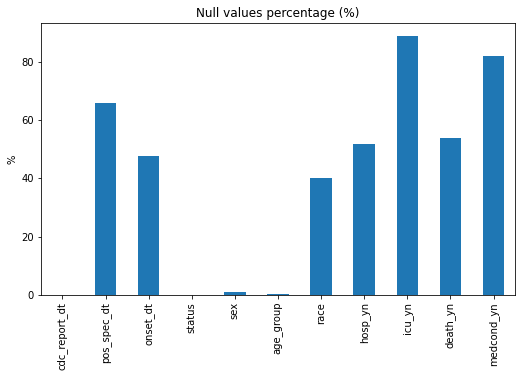

In [ ]:
plt.figure(figsize=(8.5,5))
round(DataSet_replace.isnull().sum()*100/len(DataSet_replace),2).plot.bar()
plt.ylabel('%')
plt.title('Null values percentage (%)')
plt.show()

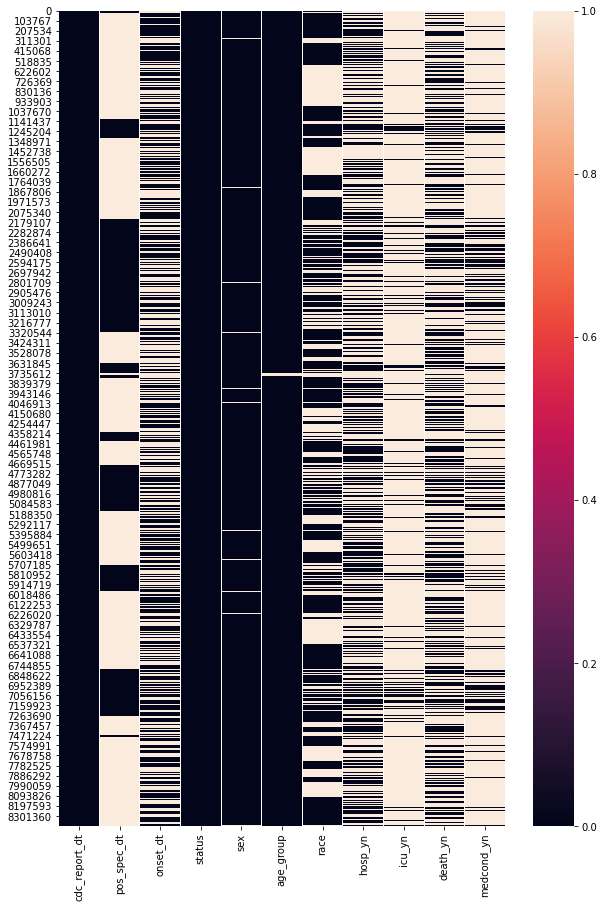

In [ ]:
plt.figure(figsize=(10,15))
ax = sns.heatmap(DataSet_replace.isnull())
plt.show()

In [ ]:
DataSet_replace['status'].unique()

array(['Laboratory-confirmed case', 'Probable Case'], dtype=object)

# EDA de cantidad de casos confirmados- recepcionados por CDC

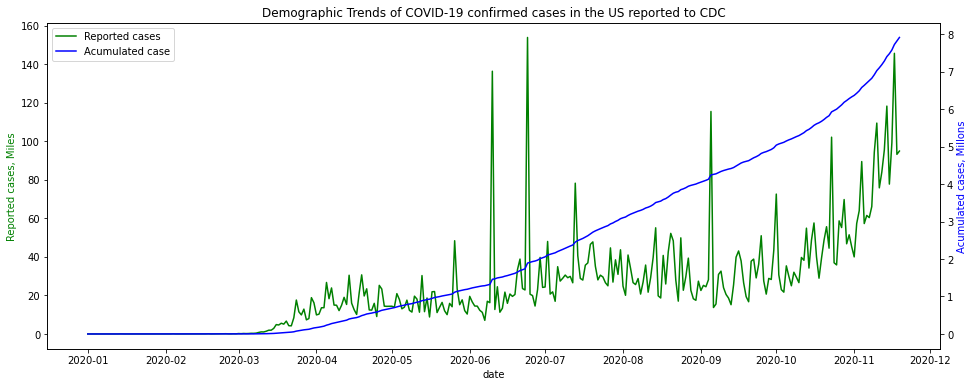

In [ ]:
df_confirmedCase = DataSet_replace[(DataSet_replace['status'] =='Laboratory-confirmed case')].reset_index(drop=True)    # Se trabajará con casos confirmados 'status' - colummn

df = df_confirmedCase 
values_date = df['cdc_report_dt'].value_counts().sort_index()

laSuma, acum = 0, []
for i in values_date: 
  laSuma = laSuma + i
  acum.append(laSuma)
cases = pd.DataFrame({'date':values_date.index.values, 
                      'report_cases':values_date.values, 
                      'acum_cases':acum, })
cases['date'] = pd.to_datetime(cases['date'])   # Convertir a datos temporales
x = cases['date']
y1 = cases['report_cases']/1000
y2 = cases['acum_cases']/1000000
fig, ax1 = plt.subplots(figsize=(16,6))
# create line plot of y1(x)
line1, = ax1.plot(x, y1, 'g')
ax1.set_xlabel('date')
ax1.set_ylabel('Reported cases, Miles', color='g')
# create shared axis for y2(x)
ax2 = ax1.twinx()
# create line plot of y2(x)
line2, = ax2.plot(x, y2, 'b')
ax2.set_ylabel('Acumulated cases, Millons', color='b')
# set title, plot limits, etc
plt.title('Demographic Trends of COVID-19 confirmed cases in the US reported to CDC')
# add a legend, and position it on the upper right
plt.legend((line1, line2), ('Reported cases', 'Acumulated case'))

plt.show()

In [ ]:
# Eliminamos las variables 'pos_spec_dt', 'onset_dt' para EDA & #Null values"
df_tuned = DataSet_replace.drop(columns=['pos_spec_dt', 'onset_dt'])
df_tuned

,cdc_report_dt,status,sex,age_group,race,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,NaN,No,No
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",NaN,NaN,No,NaN
4,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
...,...,...,...,...,...,...,...,...,...
8405074,2020/10/22,Probable Case,NaN,30 - 39 Years,NaN,No,NaN,No,NaN
8405075,2020/10/25,Laboratory-confirmed case,NaN,30 - 39 Years,NaN,NaN,NaN,NaN,NaN
8405076,2020/07/18,Laboratory-confirmed case,NaN,30 - 39 Years,NaN,NaN,NaN,NaN,NaN
8405077,2020/11/19,Laboratory-confirmed case,NaN,30 - 39 Years,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Data preprocesada para realizar EDA, teniendo en cuenta la cantidad de datos nulos de las columnas 'sex','age_group' y las variables de hipótesis.
df_tuned_cleaning = df_tuned.dropna(subset=['sex','age_group','death_yn','medcond_yn']).reset_index(drop=True)


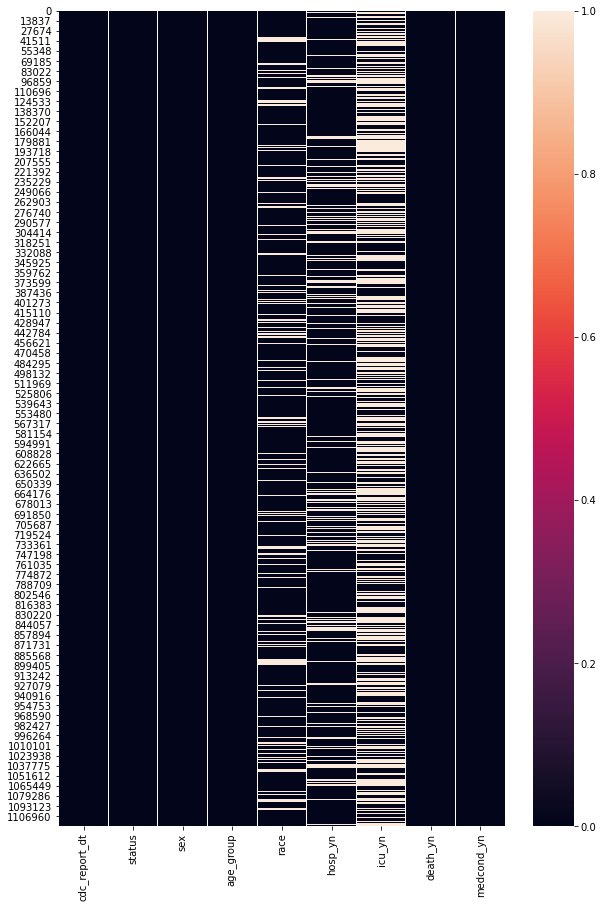

In [ ]:
plt.figure(figsize=(10,15))
ax = sns.heatmap(df_tuned_cleaning.isnull())
plt.show()

In [112]:
# Data Set pre-procesada..
df_tuned_cleaning.isnull().sum()

cdc_report_dt         0
status                0
sex                   0
age_group             0
race             172989
hosp_yn          169321
icu_yn           560291
death_yn              0
medcond_yn            0
dtype: int64

##Reemplazando mis valores nulos por el texto 

In [113]:
# Reemplazando mis valores nulos por el texto 'unknown'.
df_fillna  = df_tuned_cleaning.fillna('unknown')

##Limpiando  mis valores nulos del DataSet

In [114]:
# Reemplazando mis valores nulos por el texto 'unknown'.
df_dropna  = df_tuned_cleaning.dropna().reset_index(drop=True)

In [115]:
df_final_tuned = df_fillna

In [116]:
df_final_tuned.isnull().sum()

cdc_report_dt    0
status           0
sex              0
age_group        0
race             0
hosp_yn          0
icu_yn           0
death_yn         0
medcond_yn       0
dtype: int64

In [117]:
df_final_tuned.shape

(1120723, 9)

In [118]:
dff = df_final_tuned.copy()

## Visualización del Data Set - EDA

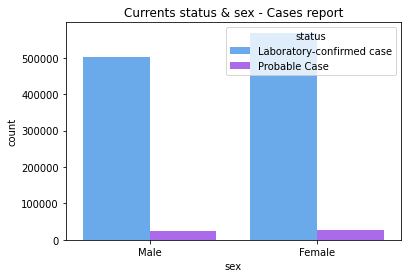

In [119]:
# Plotting variables 'sex' and 'current_status'
ax = sns.countplot(x="sex", hue='status', data=dff, palette="cool")
plt.title('Currents status & sex - Cases report')
plt.show()

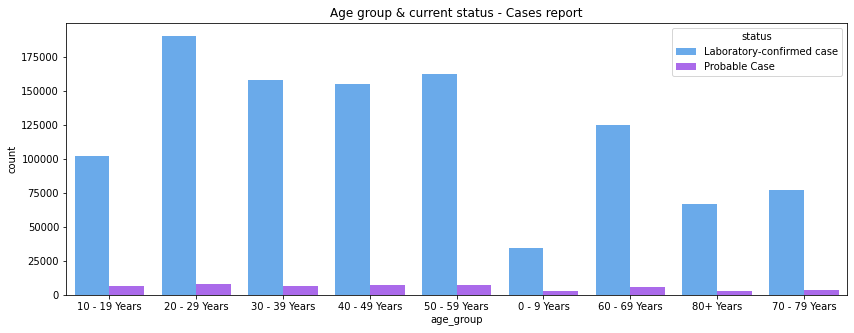

In [120]:
fig, ax = plt.subplots(figsize=(14,5))
ax = sns.countplot(x="age_group", hue='status', data=dff, palette="cool")
plt.title('Age group & current status - Cases report')
plt.show()

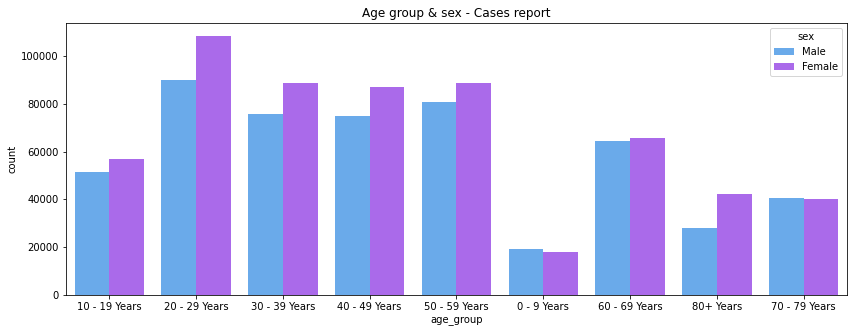

In [121]:
fig, ax = plt.subplots(figsize=(14,5))
ax = sns.countplot(x="age_group", hue='sex', data=dff, palette="cool")
plt.title('Age group & sex - Cases report')
plt.show()

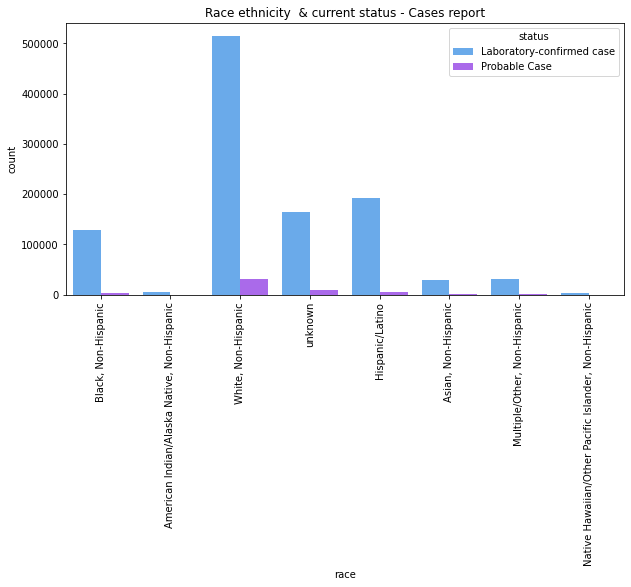

In [122]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation=90)
ax = sns.countplot(x='race', hue='status',data=dff, palette="cool")
plt.title('Race ethnicity  & current status - Cases report')
plt.show()

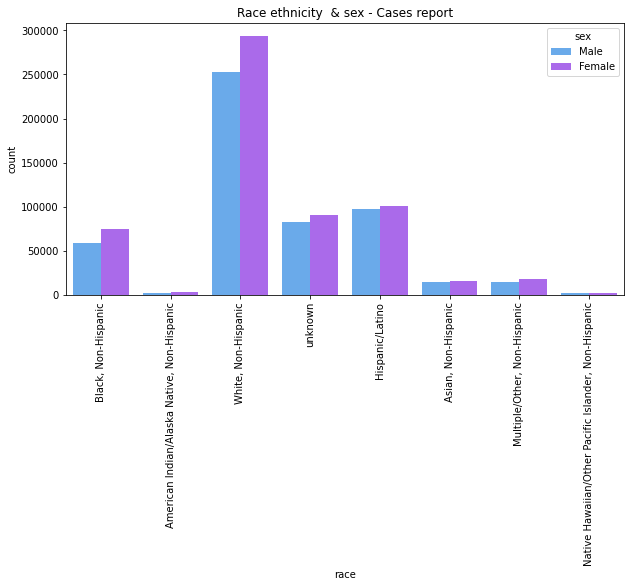

In [123]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation=90)
ax = sns.countplot(x="race", hue='sex',data=dff, palette="cool")
plt.title('Race ethnicity  & sex - Cases report')
plt.show()

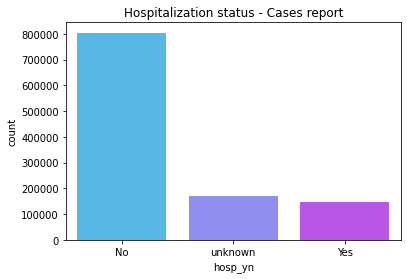

In [124]:
fig, ax = plt.subplots()
ax = sns.countplot(x="hosp_yn", data=dff, palette="cool")
plt.title('Hospitalization status - Cases report')
plt.show()

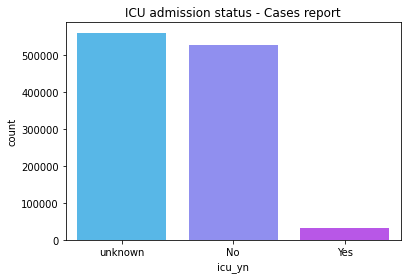

In [125]:
fig, ax = plt.subplots()
ax = sns.countplot(x="icu_yn", data=dff, palette="cool")
plt.title('ICU admission status - Cases report')
plt.show()

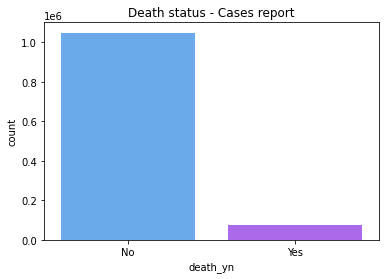

In [126]:
fig, ax = plt.subplots()
ax = sns.countplot(x="death_yn", data=dff, palette="cool")
plt.title('Death status - Cases report')
plt.show()

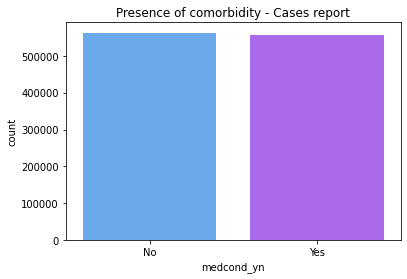

In [127]:
fig, ax = plt.subplots()
ax = sns.countplot(x="medcond_yn", data=dff, palette="cool")
plt.title('Presence of comorbidity - Cases report')
plt.show()

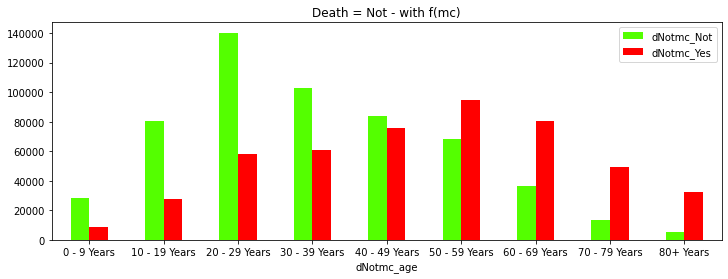

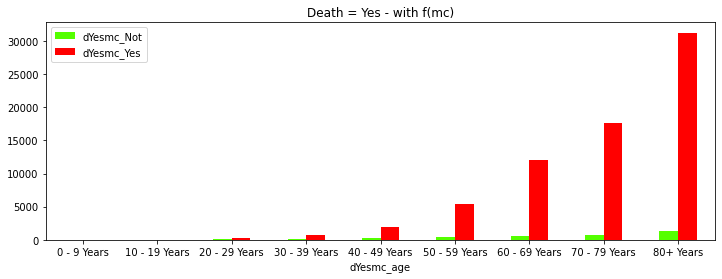

In [128]:
df = dff
group = df.groupby(['age_group','death_yn','medcond_yn']).count()
trasp = group.T

lista_index = [list(group.index.values[i]) for i in range(len(group))]
data_index = pd.DataFrame(data= lista_index, columns=['age', 'death', 'medcond'])
data_value = pd.DataFrame({'count': trasp.values[0]})
data_count = pd.concat([data_index,data_value], axis=1)

df = data_count
df_death_not = df[df['death']=='No']
df_death_not_medcond_not = df_death_not[df_death_not['medcond']=='No' ].reset_index(drop=True)['count']
df_death_not_medcond_yes = df_death_not[df_death_not['medcond']=='Yes'].reset_index(drop=True)['count']
df_death_not_medcond_col = df_death_not[df_death_not['medcond']=='Yes'].reset_index(drop=True)['age']
death_not_mc = pd.DataFrame({'dNotmc_age': df_death_not_medcond_col,
                             'dNotmc_Not': df_death_not_medcond_not,
                             'dNotmc_Yes': df_death_not_medcond_yes})

ax = death_not_mc.plot.bar(x = 'dNotmc_age', y = ['dNotmc_Not','dNotmc_Yes'], figsize=(12,4), cmap='prism_r')
plt.xticks(rotation=0)
plt.title('Death = Not - with f(mc)')
plt.show()

df = data_count
df_death_yes = df[df['death']=='Yes']
df_death_yes_medcond_not = df_death_yes[df_death_yes['medcond']=='No' ].reset_index(drop=True)['count']
df_death_yes_medcond_yes = df_death_yes[df_death_yes['medcond']=='Yes'].reset_index(drop=True)['count']
df_death_yes_medcond_col = df_death_yes[df_death_yes['medcond']=='Yes'].reset_index(drop=True)['age']
death_yes_mc = pd.DataFrame({'dYesmc_age': df_death_yes_medcond_col,
                             'dYesmc_Not': df_death_yes_medcond_not,
                             'dYesmc_Yes': df_death_yes_medcond_yes})

ax = death_yes_mc.plot.bar(x = 'dYesmc_age', y = ['dYesmc_Not','dYesmc_Yes'], figsize=(12,4), cmap='prism_r')
plt.xticks(rotation=0)
plt.title('Death = Yes - with f(mc)')

plt.show()

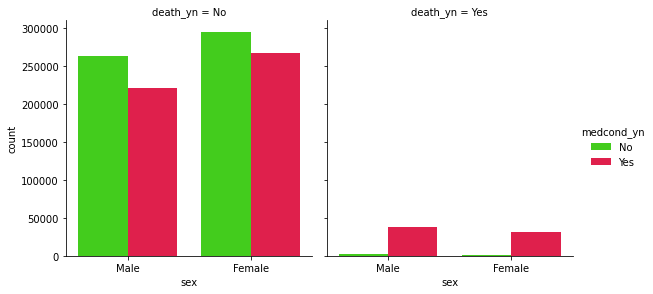

In [129]:
ax = sns.catplot(data=dff, 
                 kind="count", 
                 x="sex", 
                 hue='medcond_yn', 
                 col='death_yn', 
                 palette="prism",height=4, aspect=1)
plt.show()

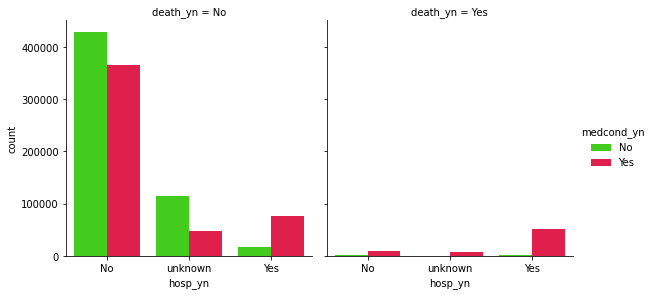

In [130]:
ax = sns.catplot(data=dff, 
                 kind="count", 
                 x="hosp_yn", 
                 hue='medcond_yn', 
                 col='death_yn', 
                 palette="prism",height=4, aspect=1)
plt.show()

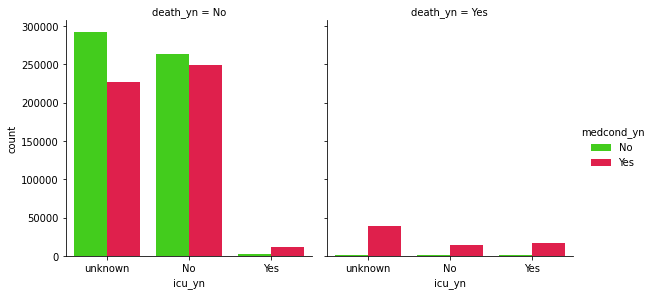

In [131]:
ax = sns.catplot(data=dff, 
                 kind="count", 
                 x="icu_yn", 
                 hue='medcond_yn', 
                 col='death_yn', 
                 palette="prism",height=4, aspect=1)
plt.show()

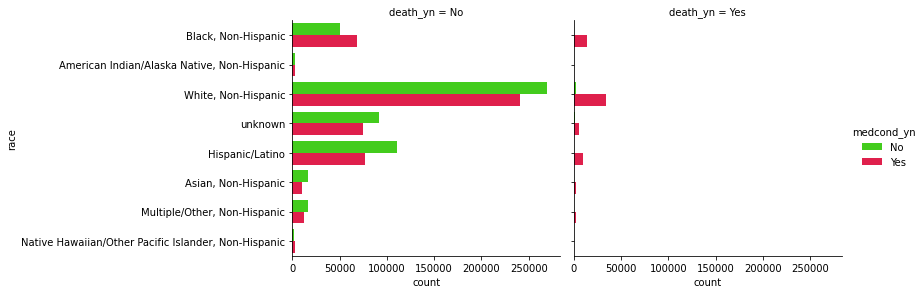

In [132]:
ax = sns.catplot(data=dff, 
                 kind="count", 
                 y="race", 
                 hue='medcond_yn', 
                 col='death_yn', 
                 palette="prism",height=4, aspect=1.5)
plt.show()

H0 = La varaible "Personas con enfermedades Pre-Existentes" no es significativo para explicar el fallecimiento de una persona confirmada de covid-19 en EEUU en el año 2020.

Ha = La varaible "Personas con enfermedades Pre-Existentes" es significativo para explicar el fallecimiento de una persona confirmada de covid-19 en EEUU en el año 2020. 


## Validación de Hipótesis

H0 = El modelo de Arboles de Desiciones explica el fallecimiento de una persona confirmada de covid-19 en EEUU en el año 2020 con un aproximación inferior a 80%.

Ha = El modelo de Arboles de Desiciones explica el fallecimiento de una persona confirmada de covid-19 en EEUU en el año 2020 con un aproximación superior a 80%.

## Modelo predictivo - ML Covid-19 Case Surveillance Public Use Dataset

In [133]:
# Machine Learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from sklearn import preprocessing
lb_make = preprocessing.LabelEncoder()

In [134]:
# Import required libraries for performance metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

from pylab import rcParams

In [135]:
# Import required libraries for balance data
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter
LABELS = ["No","Yes"]

In [136]:
def mostrar_resultados(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, y_pred))

In [137]:
# Machine Learnig to improve model
df_ml = dff
df_ml.shape

(1120723, 9)

In [138]:
df_ml.columns

Index(['cdc_report_dt', 'status', 'sex', 'age_group', 'race', 'hosp_yn',
       'icu_yn', 'death_yn', 'medcond_yn'],
      dtype='object')

In [139]:
# Predictors define
df_predictors = df_ml.drop(columns=['cdc_report_dt','death_yn']) 
df_predictors.columns

Index(['status', 'sex', 'age_group', 'race', 'hosp_yn', 'icu_yn',
       'medcond_yn'],
      dtype='object')

In [140]:
# Target define
df_target = df_ml[['death_yn']]
df_target.columns

Index(['death_yn'], dtype='object')

In [141]:
# # Pandas.get_dummies application to Predictors
# df_dummies_predictors = pd.get_dummies(df_predictors)
# df_dummies_predictors.head()

In [142]:
# df_dummies_predictors.columns

In [143]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

df = df_predictors.copy()
df["status"] = lb_make.fit_transform(df["status"])
df["sex"] = lb_make.fit_transform(df["sex"])
df["age_group"] = lb_make.fit_transform(df["age_group"])
df["race"] = lb_make.fit_transform(df["race"])

df["hosp_yn"] = lb_make.fit_transform(df["hosp_yn"])
df["icu_yn"] = lb_make.fit_transform(df["icu_yn"])
df["medcond_yn"] = lb_make.fit_transform(df["medcond_yn"])
df_ecoder_predictors = df
df_ecoder_predictors

,status,sex,age_group,race,hosp_yn,icu_yn,medcond_yn
0,0,1,1,2,0,2,0
1,0,1,1,2,0,0,0
2,0,1,1,2,0,0,0
3,0,1,1,2,0,0,1
4,0,1,1,2,0,0,0
...,...,...,...,...,...,...,...
1120718,0,0,3,3,1,2,1
1120719,0,0,3,3,0,2,1
1120720,0,0,3,3,0,2,1
1120721,0,0,3,3,0,2,0


In [144]:
df_encoder_target= lb_make.fit_transform(df_target["death_yn"])
df_encoder_target

array([0, 0, 0, ..., 0, 0, 0])

In [145]:
X = df_ecoder_predictors.values
y = df_encoder_target

In [146]:
X_cols = df_ecoder_predictors.columns.to_list()
y_cols = ['death_yn']

# Selección de los Componentes Principales PCA

In [223]:
#Aplicamos una transformación de los datos para poder aplicar las propiedades de la distribución normal
from sklearn.preprocessing import StandardScaler
predictors_std = StandardScaler().fit_transform(df_ecoder_predictors.values)
predictors_std

array([[-0.21756424,  1.06619222, -1.37755479, ..., -0.58532117,
         0.98618361, -0.99542326],
       [-0.21756424,  1.06619222, -1.37755479, ..., -0.58532117,
        -1.04378112, -0.99542326],
       [-0.21756424,  1.06619222, -1.37755479, ..., -0.58532117,
        -1.04378112, -0.99542326],
       ...,
       [-0.21756424, -0.93791718, -0.43591827, ..., -0.58532117,
         0.98618361,  1.00459779],
       [-0.21756424, -0.93791718, -0.43591827, ..., -0.58532117,
         0.98618361, -0.99542326],
       [-0.21756424, -0.93791718, -0.43591827, ..., -0.58532117,
         0.98618361,  1.00459779]])

In [290]:
from sklearn.decomposition import PCA
pca = PCA()
predictors_pca = pca.fit_transform(predictors_std)
predictors_pca

array([[-1.31558381,  1.5656496 , -1.12650783, ...,  0.8800457 ,
        -0.8868824 , -0.25248153],
       [-1.93465038,  0.33764919, -1.48690507, ...,  0.77989586,
         0.53587118, -0.02638039],
       [-1.93465038,  0.33764919, -1.48690507, ...,  0.77989586,
         0.53587118, -0.02638039],
       ...,
       [ 0.40742671,  0.24331214, -1.01167106, ...,  0.68498328,
        -1.21735816,  0.4852602 ],
       [-0.73332292,  1.03585816, -0.69720311, ...,  0.31253409,
        -0.77318577, -0.79370073],
       [ 0.40742671,  0.24331214, -1.01167106, ...,  0.68498328,
        -1.21735816,  0.4852602 ]])

In [291]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.20681422, 0.19068414, 0.15024592, 0.14285429, 0.13354191,
       0.09628905, 0.07957047])

Porcentaje de varianza explicada por cada componente
[0.20681422 0.19068414 0.15024592 0.14285429 0.13354191 0.09628905
 0.07957047]


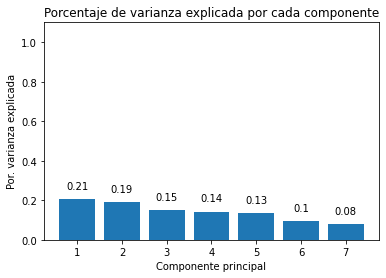

In [258]:
# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente')
print(explained_variance)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(x= np.arange(modelo_pca.n_components_) + 1,  height = modelo_pca.explained_variance_ratio_)

for x, y in zip(np.arange(len(X_cols)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

Porcentaje de varianza explicada acumulada
[0.20681422 0.39749836 0.54774428 0.69059857 0.82414048 0.92042953
 1.        ]


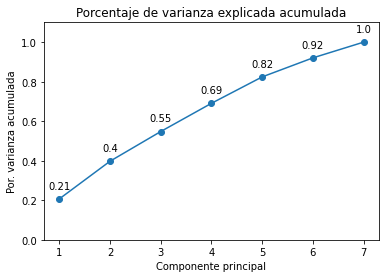

In [259]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = explained_variance.cumsum()
print('Porcentaje de varianza explicada acumulada')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(np.arange(len(X_cols)) + 1, prop_varianza_acum, marker = 'o')

for x, y in zip(np.arange(len(X_cols)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')  
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Si se empleasen únicamente las cinco primeras componentes se conseguiría explicar el 82% de la varianza observada.

In [329]:
from sklearn.model_selection import train_test_split
X = predictors_pca[:,0:5]
y = df_encoder_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [332]:
# X_cols = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7']
X_cols = ['PC1','PC2','PC3','PC4','PC5']
# X_cols = ['PC1','PC2']

In [333]:
X.shape, y.shape

((1120723, 5), (1120723,))

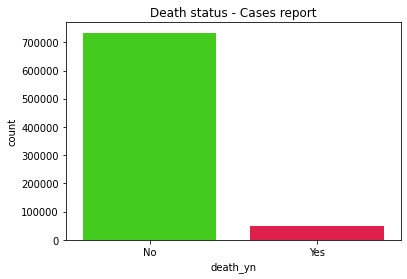

In [334]:
# Datos sin balanceo de la varaibles 'death_yn'
X_df = pd.DataFrame(data=X_train, columns=X_cols)
y_df = pd.DataFrame(data=y_train, columns=y_cols)
df_wbal = pd.concat([X_df, y_df], axis=1)

fig, ax = plt.subplots()
ax = sns.countplot(x="death_yn", data=df_wbal, palette="prism")
plt.xticks([0,1],labels=LABELS)
plt.title('Death status - Cases report')
plt.show()

Model Used:  RandomUnderSampler(random_state=0, ratio=0.5, replacement=False,
                   return_indices=False, sampling_strategy=0.5)
Distribution before resampling Counter({0: 733533, 1: 50973})
Distribution after  resampling Counter({0: 101946, 1: 50973})


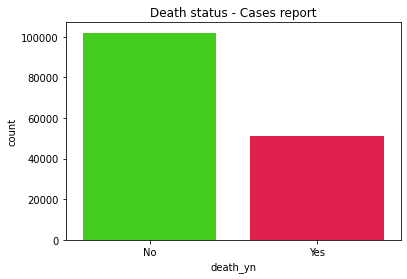

In [335]:
# Balanceo de datos Method RandomUnderSampler 
rus = RandomUnderSampler(ratio=0.50, random_state=0)
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)
print('Model Used: ', rus)
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after  resampling {}".format(Counter(y_train_rus)))

X_df = pd.DataFrame(data=X_train_rus, columns=X_cols)
y_df = pd.DataFrame(data=y_train_rus, columns=y_cols)
df_bal = pd.concat([X_df, y_df], axis=1)

fig, ax = plt.subplots()
ax = sns.countplot(x="death_yn", data=df_bal, palette="prism")
plt.xticks([0,1],labels=LABELS)
plt.title('Death status - Cases report')
plt.show()

Model Used:  RandomOverSampler(random_state=0, ratio=0.5, return_indices=False,
                  sampling_strategy=0.5)
Distribution before resampling Counter({0: 733533, 1: 50973})
Distribution after  resampling Counter({0: 733533, 1: 366766})


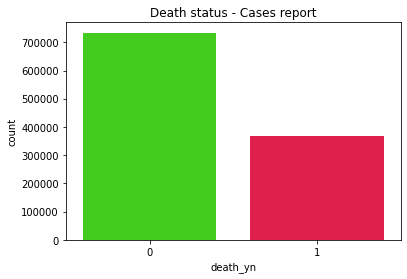

In [336]:
# Balanceo de datos Method RandomOverSampler 
ros = RandomOverSampler(ratio=0.50, random_state=0)
X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)
print('Model Used: ', ros) 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after  resampling {}".format(Counter(y_train_ros)))

X_df = pd.DataFrame(data=X_train_ros, columns=X_cols)
y_df = pd.DataFrame(data=y_train_ros, columns=y_cols)
df_bal = pd.concat([X_df, y_df], axis=1)

fig, ax = plt.subplots()
plt.xticks([0,1],labels=LABELS)
ax = sns.countplot(x="death_yn", data=df_bal, palette="prism")
plt.title('Death status - Cases report')
plt.show()

In [337]:
# # Balanceo de datos Method Smote-Tomek 
# stm = SMOTETomek(ratio=1.0, random_state=0)
# X_train_stm, y_train_stm = stm.fit_sample(X_train, y_train)
# print('Model Used: ', stm )
# print ("Distribution before resampling {}".format(Counter(y_train)))
# print ("Distribution after  resampling {}".format(Counter(y_train_stm)))

# X_df = pd.DataFrame(data=X_train_stm, columns=X_cols)
# y_df = pd.DataFrame(data=y_train_stm, columns=y_cols)
# df_bal = pd.concat([X_df, y_df], axis=1)

# fig, ax = plt.subplots()
# plt.xticks([0,1],labels=LABELS)
# ax = sns.countplot(x="death_yn", data=df_bal, palette="prism")
# plt.title('Presence of comorbidity - Cases report')
# plt.show()

## Logistic Regression Model

Model Used:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


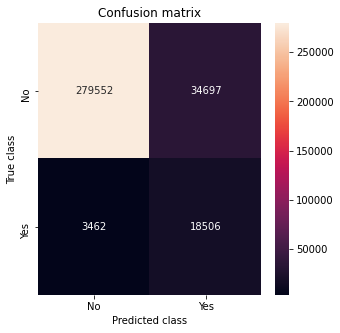

              precision    recall  f1-score   support

           0       0.99      0.89      0.94    314249
           1       0.35      0.84      0.49     21968

    accuracy                           0.89    336217
   macro avg       0.67      0.87      0.71    336217
weighted avg       0.95      0.89      0.91    336217

No Skill: ROC AUC=0.500
Model Predicted: ROC AUC=0.936


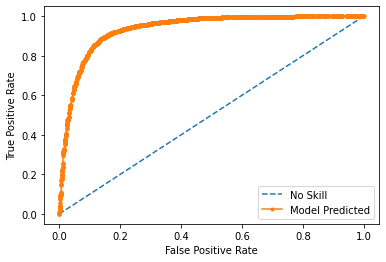

In [338]:
# fit a model
model = LogisticRegression(random_state=0)
model.fit(X_train_rus, y_train_rus)
# summarize scores
print('Model Used: ', model)
y_pred = model.predict(X_test)
mostrar_resultados(y_test, y_pred)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
model_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
model_probs = model_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
model_auc = roc_auc_score(y_test, model_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Model Predicted: ROC AUC=%.3f' % (model_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(model_fpr, model_tpr, marker='.', label='Model Predicted')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Random Forest Classifier Model

Model Used:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


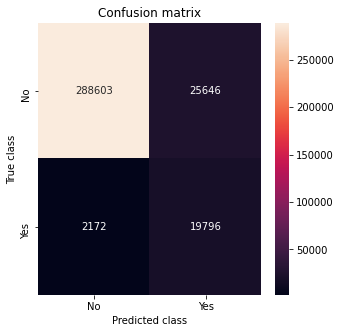

              precision    recall  f1-score   support

           0       0.99      0.92      0.95    314249
           1       0.44      0.90      0.59     21968

    accuracy                           0.92    336217
   macro avg       0.71      0.91      0.77    336217
weighted avg       0.96      0.92      0.93    336217

No Skill: ROC AUC=0.500
Model Predicted: ROC AUC=0.963


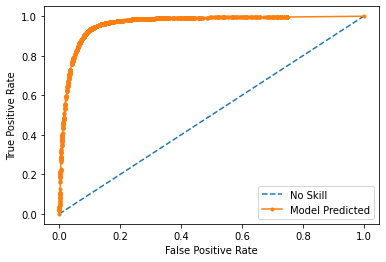

In [339]:
# fit a model
model = RandomForestClassifier(random_state=0)
model.fit(X_train_rus, y_train_rus)
# summarize scores
print('Model Used: ', model)
y_pred = model.predict(X_test)
mostrar_resultados(y_test, y_pred)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
model_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
model_probs = model_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
model_auc = roc_auc_score(y_test, model_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Model Predicted: ROC AUC=%.3f' % (model_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(model_fpr, model_tpr, marker='.', label='Model Predicted')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Decision Tree Classifier Model

Model Used:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


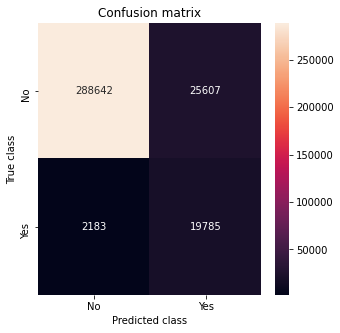

              precision    recall  f1-score   support

           0       0.99      0.92      0.95    314249
           1       0.44      0.90      0.59     21968

    accuracy                           0.92    336217
   macro avg       0.71      0.91      0.77    336217
weighted avg       0.96      0.92      0.93    336217

No Skill: ROC AUC=0.500
Model Predicted: ROC AUC=0.961


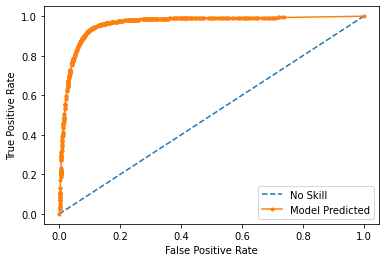

In [340]:
# fit a model
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train_rus, y_train_rus)
# summarize scores
print('Model Used: ', model)
y_pred = model.predict(X_test)
mostrar_resultados(y_test, y_pred)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
model_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
model_probs = model_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
model_auc = roc_auc_score(y_test, model_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Model Predicted: ROC AUC=%.3f' % (model_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(model_fpr, model_tpr, marker='.', label='Model Predicted')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## KNeighbors Classifier Model

Model Used:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


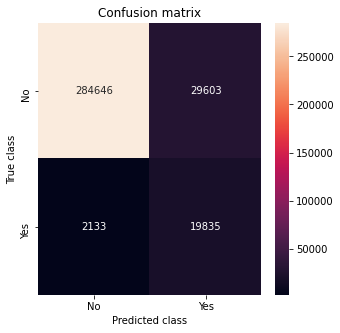

              precision    recall  f1-score   support

           0       0.99      0.91      0.95    314249
           1       0.40      0.90      0.56     21968

    accuracy                           0.91    336217
   macro avg       0.70      0.90      0.75    336217
weighted avg       0.95      0.91      0.92    336217

No Skill: ROC AUC=0.500
Model Predicted: ROC AUC=0.941


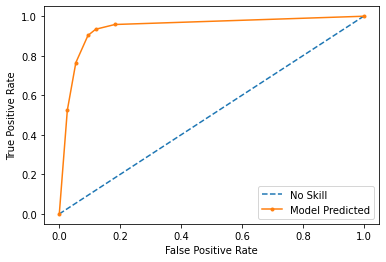

In [341]:
# fit a model
model = KNeighborsClassifier()
model.fit(X_train_rus, y_train_rus)
# summarize scores
print('Model Used: ', model)
y_pred = model.predict(X_test)
mostrar_resultados(y_test, y_pred)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
model_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
model_probs = model_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
model_auc = roc_auc_score(y_test, model_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Model Predicted: ROC AUC=%.3f' % (model_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(model_fpr, model_tpr, marker='.', label='Model Predicted')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [346]:
# Abstrac 
table_model =pd.DataFrame({'Model'      :['LRM','RFC','DTC','KNC'],
                           'precisionNot':[0.99,0.99,0.99,0.99],
                           'precisionYes':[0.35,0.44,0.44,0.40],
                           'recallNot'   :[0.89,0.92,0.92,0.91],
                           'recallYes'   :[0.84,0.90,0.90,0.90],
                           'f1-scoreNot' :[0.94,0.95,0.95,0.95],
                           'f1-scoreYes' :[0.49,0.59,0.59,0.56],
                           'accuracy'    :[0.89,0.92,0.92,0.91],
                           'ROC_AUC'     :[0.936,0.963,0.961,0.941],
                           'run_timeSeg' :[3.115,23.81,2.972,21.56]
                           })
table_model.T

,0,1,2,3
Model,LRM,RFC,DTC,KNC
precisionNot,0.99,0.99,0.99,0.99
precisionYes,0.35,0.44,0.44,0.4
recallNot,0.89,0.92,0.92,0.91
recallYes,0.84,0.9,0.9,0.9
f1-scoreNot,0.94,0.95,0.95,0.95
f1-scoreYes,0.49,0.59,0.59,0.56
accuracy,0.89,0.92,0.92,0.91
ROC_AUC,0.936,0.963,0.961,0.941
run_timeSeg,3.115,23.81,2.972,21.56


El modelo óptimo evaluado es el siguiente : DecisionTreeClassifier 

In [ ]:
#############################################

Integrantes : GRUPO 2
- Castro Mamani, Oscar
- Fernández Estela, Julio Cesar
- Dolci Flores, Juan Jose
- Mendez Rosales, Andres Alonso

